In [1]:
import tensorflow as tf

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import tqdm

In [5]:
try:
    from tqdm import tqdm 
except ImportError:
    def tqdm(x, *args, **kwargs):
        return x

In [6]:
np.random.seed(0)

In [7]:
data = np.load('data_with_labels.npz')
train = data['arr_0']/255.

In [8]:
labels = data['arr_1']

In [9]:
print(train[0])

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [10]:
print(labels[0])

0


In [11]:
import matplotlib.pyplot as plt

In [12]:
plt.ion()

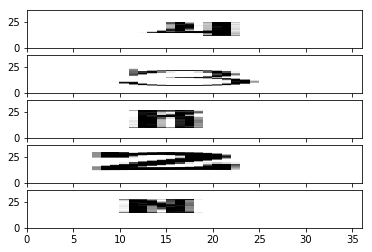

In [73]:
f, plts = plt.subplots(5, sharex=True)
c = 91
for i in range(5):
    plts[i].pcolor(train[c + i * 558],
                   cmap=plt.cm.gray_r)

In [24]:
def to_onehot(labels,nclasses=5):
    outlabels = np.zeros((len(labels),nclasses))
    for i,l in enumerate(labels):
        outlabels[i,l] = 1
    return outlabels

In [25]:
onehot = to_onehot(labels)

In [26]:
print(onehot)

[[ 1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.]
 ..., 
 [ 0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  1.]]


In [27]:
indices = np.random.permutation(train.shape[0])
valid_cnt = int(train.shape[0] * 0.1)
test_idx, training_idx = indices[:valid_cnt],\
                         indices[valid_cnt:]
test, train = train[test_idx,:],\
              train[training_idx,:]

In [28]:
onehot_test, onehot_train = onehot[test_idx,:],\
                        onehot[training_idx,:]


In [30]:
sess = tf.InteractiveSession()

In [31]:
x = tf.placeholder("float",[None,1296])

In [32]:
y_ = tf.placeholder("float",[None,5])

In [35]:
w = tf.Variable(tf.zeros([1296,5]))

In [36]:
b = tf.Variable(tf.zeros([5]))

In [38]:
sess.run(tf.global_variables_initializer())

In [40]:
y = tf.nn.softmax(tf.matmul(x,w)+b)

In [41]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
logits = y+1e-50, labels = y_))

In [43]:
train_step = tf.train.GradientDescentOptimizer(0.02).minimize(cross_entropy)

In [44]:
correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(y_,1))

In [46]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

In [59]:
epochs = 1000
train_acc = np.zeros(epochs//10)
test_acc = np.zeros(epochs//10)
for i in tqdm(range(epochs)):
    if i % 10 == 0:
        A = accuracy.eval(feed_dict={
            x: train.reshape([-1,1296]),
            y_: onehot_train})
        train_acc[i//10] = A
        A = accuracy.eval(feed_dict={
            x:test.reshape([-1,1296]),
            y_: onehot_test})
        test_acc[i//10]=A
    train_step.run(feed_dict={
        x: train.reshape([-1,1296]),
        y_: onehot_train})

100%|██████████| 1000/1000 [00:34<00:00, 29.36it/s]


In [60]:
print(train_acc[-1])

0.651135027409


In [61]:
print(test_acc[-1])

0.591397821903


In [64]:
plt.figure(figsize=(3,6))

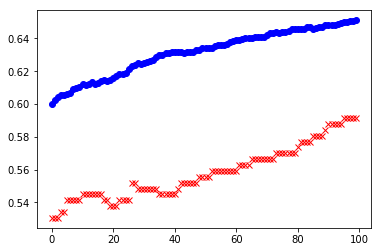

In [65]:
plt.plot(train_acc,'bo')
plt.plot(test_acc,'rx')

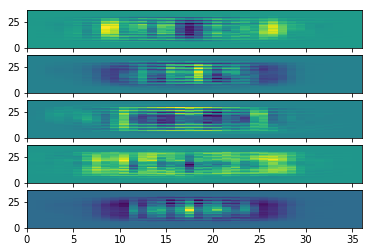

In [75]:
f, plts = plt.subplots(5, sharex=True)
for i in range(5):
    plts[i].pcolor(w.eval()[:,i].reshape([36,36]))